# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
import json
from citipy import citipy
from scipy.stats import stats
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

1f10e7155dad15c5911a68c6b4832a56


### Generate the Cities List by Using the `citipy` Library

In [36]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 578
['fiambala', 'ushuaia', 'tafresh', 'kaa-khem', 'qulsary', 'fuvahmulah', 'seme', 'thunder bay', 'tiksi', 'jayapura', 'vadso', 'nova sintra', 'inarajan village', 'port-aux-francais', 'iqaluit', 'tidjikja', 'lhokseumawe', 'alice springs', 'taiohae', 'gebeit', 'griffith', 'dapa', 'puerto aysen', 'akureyri', 'manakara', 'mount isa', 'altai', 'edinburgh of the seven seas', 'waitangi', 'blackmans bay', 'bethel', 'monte patria', 'lazaro cardenas', 'sealy', 'san jose del guaviare', 'nampula', 'lerwick', "nar'yan-mar", 'alotau', 'karratha', 'albany', 'barah', 'windhoek', 'klodzko', 'dunedin', 'longyearbyen', 'bilibino', 'grytviken', 'ancud', 'touros', 'stanley', 'olonkinbyen', 'piti village', 'adamstown', 'san patricio', "saksaul'skiy", 'juneau', 'hawaiian paradise park', 'ribeira grande', 'puerto ayora', 'hermanus', 'aasiaat', 'sitka', 'bay city', 'altamont', 'hirara', 'port alfred', 'beruniy', 'wailua homesteads', 'khanty-mansiysk', 'vorgashor', 'ceerigaabo', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [38]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
q_url = f"{url}appid={weather_api_key}&units={units}&q="
print(q_url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = q_url + city
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_json = requests.get(q_url + city).json()
        #pprint(city_weather_json)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=
Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=fiambala
Processing Record 1 of Set 1 | fiambala
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=ushuaia
Processing Record 2 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=tafresh
Processing Record 3 of Set 1 | tafresh
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=kaa-khem
Processing Record 4 of Set 1 | kaa-khem
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=metric&q=qulsary
Processing Record 5 of Set 1 | qulsary
http://api.openweathermap.org/data/2.5/weather?appid=1f10e7155dad15c5911a68c6b4832a56&units=me

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [29]:
# Display sample data
city_data_df.head()

""


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barentu,15.1139,37.5928,18.95,87,98,2.78,ER,1693433482
1,kapuskasing,49.4169,-82.4331,19.77,49,55,3.20,CA,1693433309
2,lebu,-37.6167,-73.6500,9.97,73,38,1.80,CL,1693433483
3,port-aux-francais,-49.3500,70.2167,4.99,90,100,18.85,TF,1693433483
4,ushuaia,-54.8000,-68.3000,1.25,95,97,1.94,AR,1693433483


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

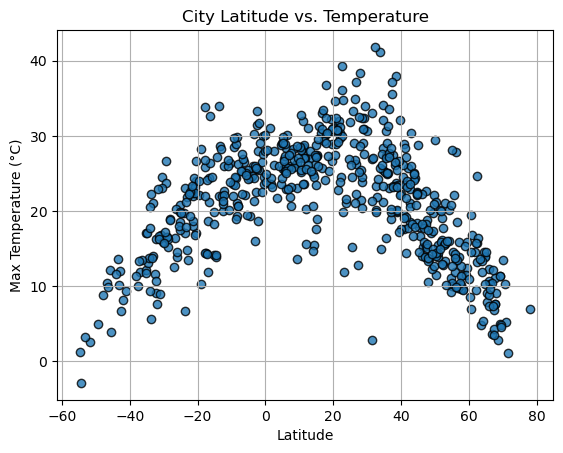

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

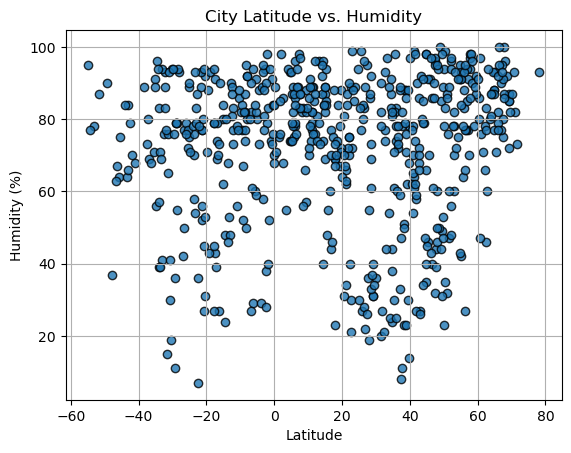

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

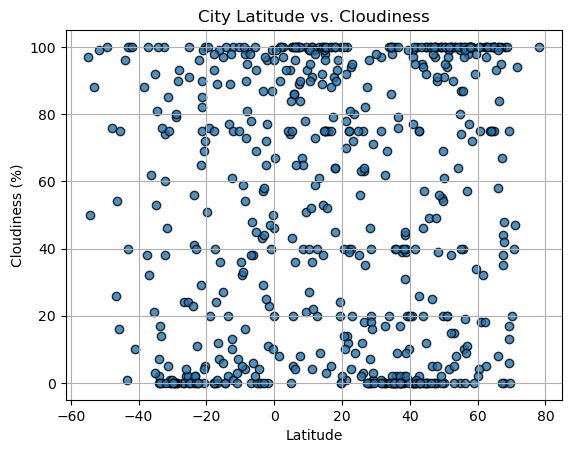

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

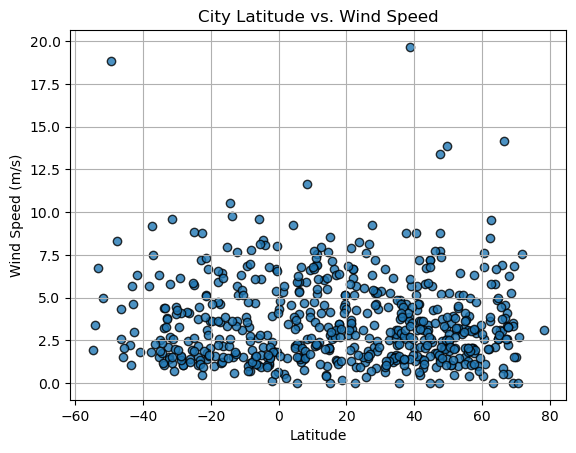

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values, x_label, y_label, title, save_filename):
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    print(regression_values)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
    print(f"Line equation: {line_eq}")
    plt.plot(x_values, regression_values, "r-")
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig("../output_data/regression.png")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barentu,15.1139,37.5928,18.95,87,98,2.78,ER,1693433482
1,kapuskasing,49.4169,-82.4331,19.77,49,55,3.20,CA,1693433309
5,gerolstein,50.2222,6.6598,11.50,94,61,1.85,DE,1693433483
9,brisas de zicatela,15.8369,-97.0419,31.29,55,75,2.57,MX,1693433484
11,dawei,14.0833,98.2000,24.90,92,100,0.44,MM,1693433484


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,lebu,-37.6167,-73.6500,9.97,73,38,1.80,CL,1693433483
3,port-aux-francais,-49.3500,70.2167,4.99,90,100,18.85,TF,1693433483
4,ushuaia,-54.8000,-68.3000,1.25,95,97,1.94,AR,1693433483
6,minas de marcona,-15.2119,-75.1103,14.21,80,27,7.94,PE,1693433484
7,puerto natales,-51.7236,-72.4875,2.61,87,99,5.00,CL,1693433484


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


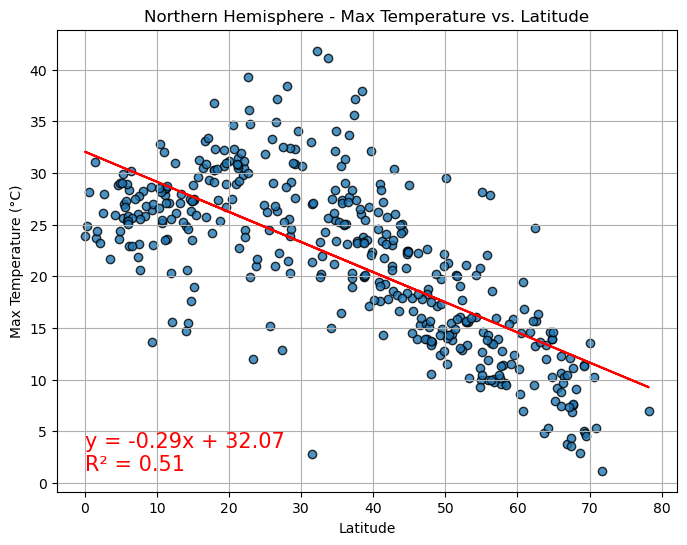

In [15]:
# Linear regression on Northern Hemisphere
def linear_regression_and_plot(x_values, y_values, x_label, y_label, title, save_filename):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.8)
    plt.plot(x_values, regression_values, "r-")
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.savefig(save_filename)
    plt.show()
    
linear_regression_and_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Max Temp"],"Latitude","Max Temperature (°C)","Northern Hemisphere - Max Temperature vs. Latitude",
    "../output_data/northern_hemisphere_max_temp_regression.png"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


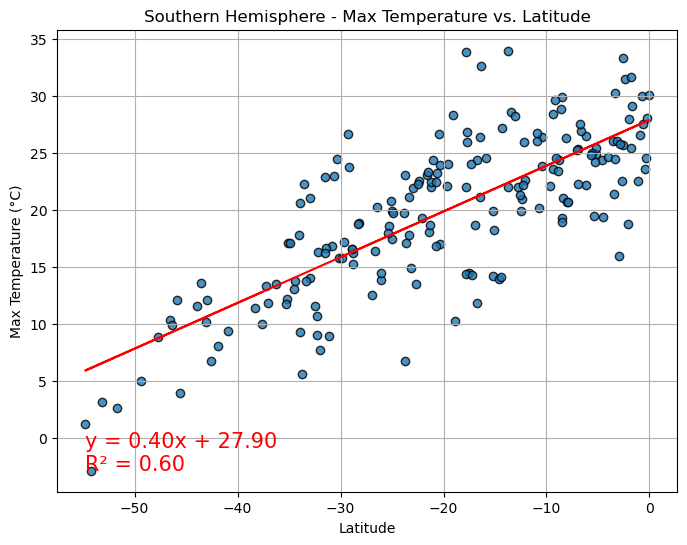

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_and_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Max Temp"],"Latitude","Max Temperature (°C)","Southern Hemisphere - Max Temperature vs. Latitude","../output_data/southern_hemisphere_max_temp_regression.png"
)

**Discussion about the linear relationship: The Northern and Southern hemispheres are opposites of eachother. The temperature in the Northern Hemisphere decreases the further you are from the Equator, but for the Southern Hemisphere, the temperture increases the closer you are to the Equator.  

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


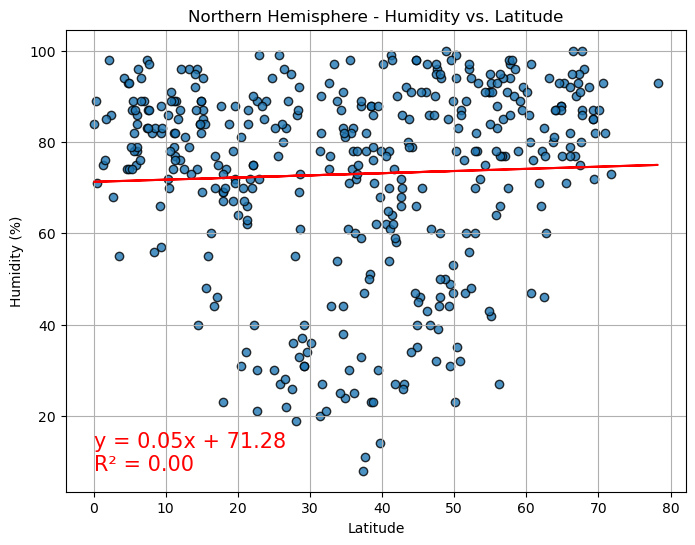

In [17]:
# Northern Hemisphere
linear_regression_and_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Humidity"],"Latitude","Humidity (%)","Northern Hemisphere - Humidity vs. Latitude","../output_data/northern_hemisphere_humidity_regression.png"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


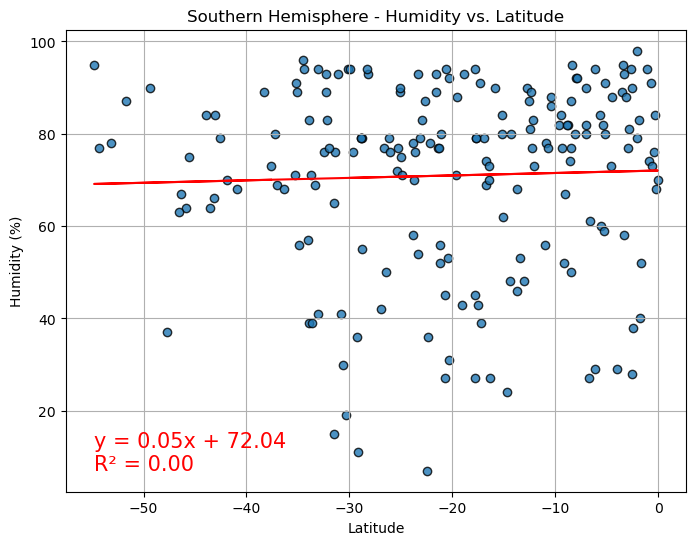

In [18]:
# Southern Hemisphere
linear_regression_and_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Humidity"],"Latitude","Humidity (%)","Southern Hemisphere - Humidity vs. Latitude","../output_data/southern_hemisphere_humidity_regression.png")

**Discussion about the linear relationship: There is not much correlation between humidity and latitude. The Northern Hemisphere humidity is consistant regardless of latitude while the humidity in the Southern Hemiphere is slightly higher when closer to the Equator. 

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


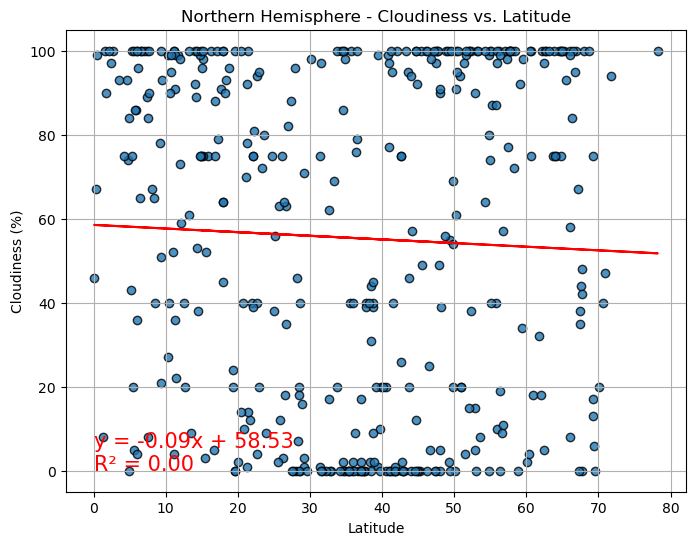

In [19]:
# Northern Hemisphere
linear_regression_and_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude","../output_data/northern_hemisphere_cloudiness_regression.png"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


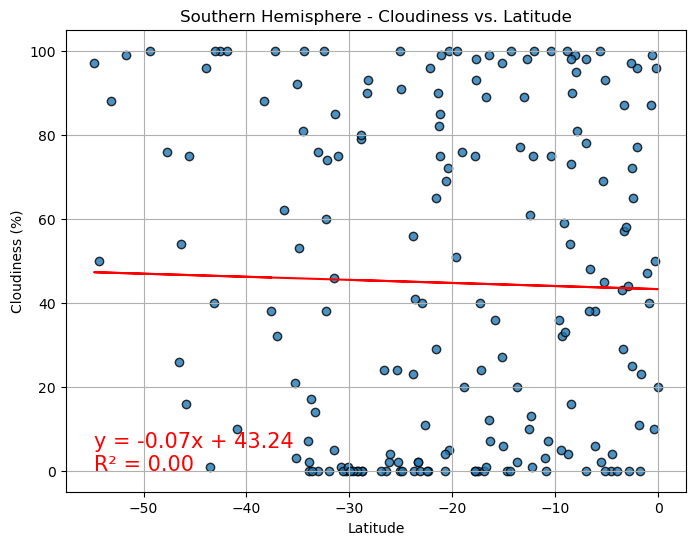

In [20]:
# Southern Hemisphere
linear_regression_and_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Cloudiness"],"Latitude","Cloudiness (%)","Southern Hemisphere - Cloudiness vs. Latitude","../output_data/southern_hemisphere_cloudiness_regression.png"
)

**Discussion about the linear relationship:** There is hardly a correlation between the cloudiness and latitude for botgh the Northern Hemisphere and the Southern Hemisphere. The Southern Hemisphere had a little higher perentage of cloudiness, the closer to the Equator  

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


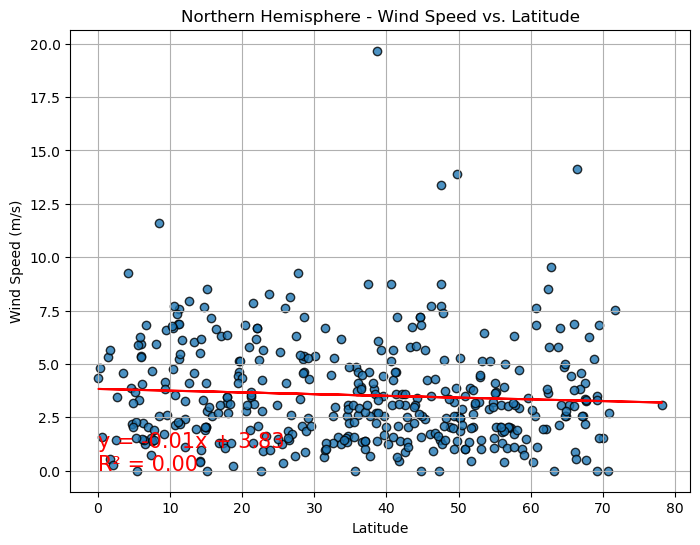

In [21]:
# Northern Hemisphere
linear_regression_and_plot(
    northern_hemi_df["Lat"],
    northern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)","Northern Hemisphere - Wind Speed vs. Latitude","../output_data/northern_hemisphere_wind_speed_regression.png"
)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


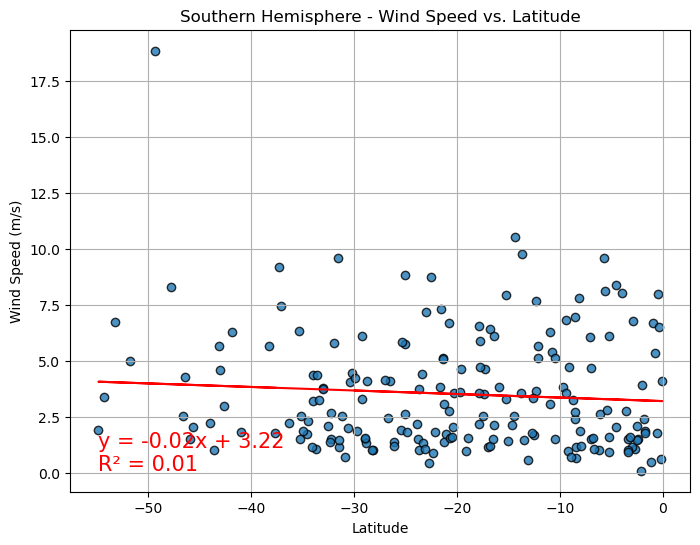

In [22]:
# Southern Hemisphere
linear_regression_and_plot(
    southern_hemi_df["Lat"],
    southern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)","Southern Hemisphere - Wind Speed vs. Latitude","../output_data/southern_hemisphere_wind_speed_regression.png"
)

**Discussion about the linear relationship:** There is not a lot of correlations for both hemispheres. The further you are from the Equator, the more the Wind Speeds decrease in the Northern Hemisphere. The higher the wind speed, the further you are from equator of the Southern Hemisphere. 